# Contour Plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Procedure

The basic procedure to create a contour plot of a function $z = f(x,y)$ over the intervals $a \leq x \leq b$ and $c \leq y \leq d$ is as follows:

1. Create a vector of $x$ values from $a$ to $b$.
2. Create a vector of $y$ values from $c$ to $d$.
3. Use `np.meshgrid` to create matrices $X$ and $Y$ of $x$ and $y$ values respectively.
4. Compute matrix $Z$ of values $z_{j,i} = f(x_i,y_j)$.
5. Plot the result with `plt.contour` and specify the number of contour lines.
6. Add a color bar and other figure properties.

For example, let's create the contour plot of the function $z = x^2 - xy + 2y^2 - 1$ over the intervals $-2 \leq x \leq 2$ and $-1 \leq y \leq 1$.

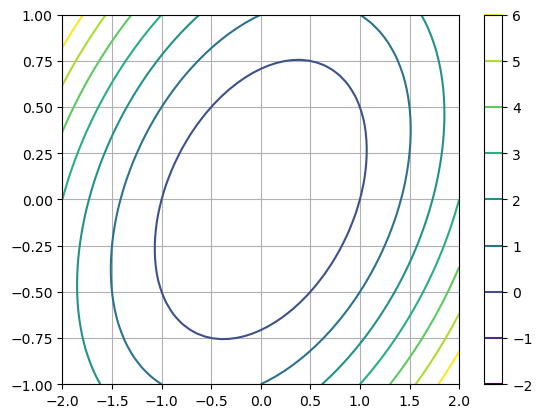

In [16]:
x = np.linspace(-2,2,51)
y = np.linspace(-1,1,51)
X,Y = np.meshgrid(x,y)
Z = X**2 - X*Y + 2*Y**2 - 1
plt.contour(X,Y,Z,levels=[-2,-1,0,1,2,3,4,5,6])
plt.grid(True), plt.colorbar()
plt.show()

There are several other options:

* Plot a filled contour plot with `plt.contourf`
* Choose a different colormap with `cmap` (see [Matplotlib colormaps](https://matplotlib.org/stable/users/explain/colors/colormaps.html))
* Set the number of levels (as opposed to setting the $z$ value of each level)

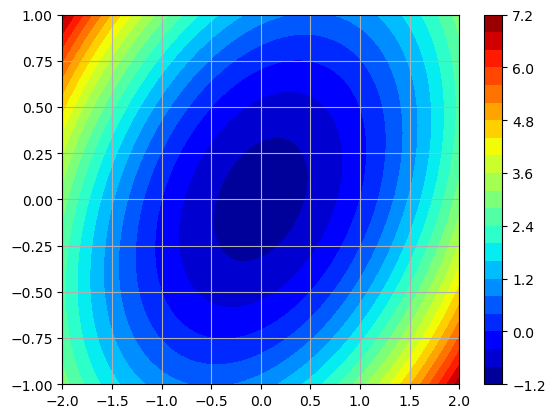

In [38]:
x = np.linspace(-2,2,51)
y = np.linspace(-1,1,51)
X,Y = np.meshgrid(x,y)
Z = X**2 - X*Y + 2*Y**2 - 1
plt.contourf(X,Y,Z,levels=20,cmap='jet')
plt.grid(True), plt.colorbar()
plt.show()

## What is `meshgrid`?

The function `np.meshgrid` takes vectors

$$
\mathbf{x} = \begin{bmatrix} x_0 & x_1 & \cdots & x_m \end{bmatrix}
\hspace{20mm}
\mathbf{y} = \begin{bmatrix} y_0 & y_1 & \cdots & y_n \end{bmatrix}
$$

and creates the matrices

$$
X = \begin{bmatrix}
x_0 & x_1 & \cdots & x_m \\
x_0 & x_1 & \cdots & x_m \\
\vdots & \vdots & \ddots & \vdots \\
x_0 & x_1 & \cdots & x_m
\end{bmatrix}
\hspace{20mm}
Y = \begin{bmatrix}
y_0 & y_0 & \cdots & y_0 \\
y_1 & y_1 & \cdots & y_1 \\
\vdots & \vdots & \ddots & \vdots \\
y_n & y_n & \cdots & y_n
\end{bmatrix}
$$

Note that the rows of the matrix $X$ are all equal to the vector $\mathbf{x}$, and the columns of the matrix $Y$ are all equal to the vector $\mathbf{y}$. For example:

In [39]:
x = np.array([-2,-1,0,1,2])
y = np.array([0,0.5,1])

In [40]:
X,Y = np.meshgrid(x,y)

In [41]:
print(X)

[[-2 -1  0  1  2]
 [-2 -1  0  1  2]
 [-2 -1  0  1  2]]


In [42]:
print(Y)

[[0.  0.  0.  0.  0. ]
 [0.5 0.5 0.5 0.5 0.5]
 [1.  1.  1.  1.  1. ]]


What's the point?!! Think about how we plot a function $z = f(x,y)$:

1. Choose a vector of $x$ values.
2. Choose a vector of $y$ values.
3. Create the grid of points $(x_i,y_j)$.
4. Compute the values $z_{ji}  = f(x_i,y_j)$ at the grid points.
5. Connect adjacent points to create the surface!

The grid of points in the $xy$-plane is represented by the "matrix" of points:

$$
\begin{bmatrix}
(x_0,y_0) & (x_1,y_0) & \cdots & (x_m,y_0) \\
(x_0,y_1) & (x_1,y_1) & \cdots & (x_m,y_1) \\
\vdots & \vdots & \ddots & \vdots \\
(x_0,y_n) & (x_1,y_n) & \cdots & (x_m,y_n) \\
\end{bmatrix}
$$

Lets write out the matrix of $z$ values:

$$
Z = \begin{bmatrix}
z_{0,0} & z_{0,1} & \cdots & z_{0,m} \\
z_{1,0} & z_{1,1} & \cdots & z_{1,m} \\
\vdots & \vdots & \ddots & \vdots \\
z_{n,0} & z_{n,1} & \cdots & z_{n,m}
\end{bmatrix}
=
\begin{bmatrix}
f(x_0,y_0) & f(x_1,y_0) & \cdots & f(x_m,y_0) \\
f(x_0,y_1) & f(x_1,y_1) & \cdots & f(x_m,y_1) \\
\vdots & \vdots & \ddots & \vdots \\
f(x_0,y_n) & f(x_1,y_n) & \cdots & f(x_m,y_n) \\
\end{bmatrix}
= f(X,Y)
$$

Note the order of $i$ and $j$ in the notation: $z_{j,i} = f(x_i,y_j)$. Therefore the matrix $Z$ of $z$ values is the result of applying the vectorized function $f(x,y)$ to the matrices $X$ and $Y$.

In the end, all we need to do is copy/paste/modify the code above for new examples!

## Examples

Plot the function $z = \cos(\pi x) + \sin(2 \pi y)$ over the intervals $-2 \leq x \leq 2$ and $-2 \leq y \leq 2$.

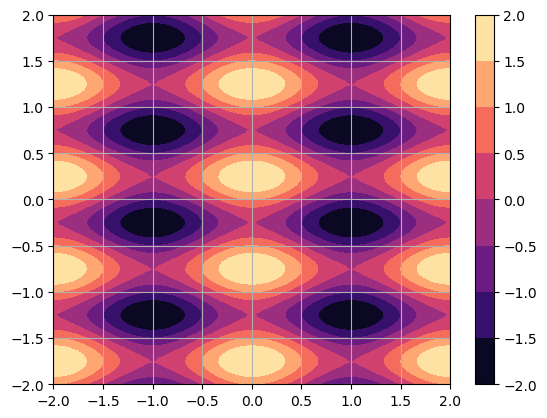

In [44]:
x = np.linspace(-2,2,101)
y = np.linspace(-2,2,101)
X,Y = np.meshgrid(x,y)
Z = np.cos(np.pi*X) + np.sin(2*np.pi*Y)
plt.contourf(X,Y,Z,cmap='magma')
plt.grid(True), plt.colorbar()
plt.show()

Plot the function $z = (x^2 + 3y^2)e^{-x^2-y^2}$ over the intervals $-2 \leq x \leq 2$ and $-2 \leq y \leq 2$.

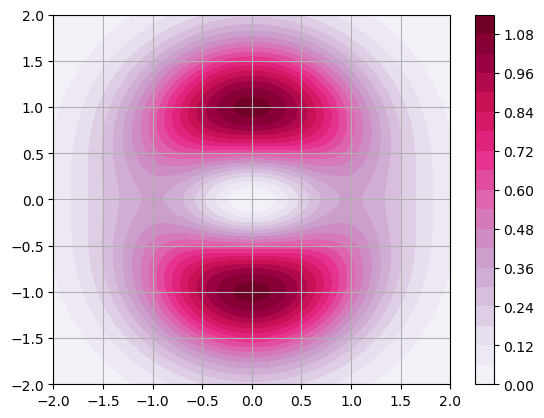

In [47]:
x = np.linspace(-2,2,101)
y = np.linspace(-2,2,101)
X,Y = np.meshgrid(x,y)
Z = (X**2 + 3*Y**2)*np.exp(-X**2-Y**2)
plt.contourf(X,Y,Z,levels=20,cmap='PuRd')
plt.grid(True), plt.colorbar()
plt.show()